# Análisis predictorio de pacientes con enfermedades cardiovasculares
#### Delgado Agustina

Las enfermedades cardiovasculares (ECV) con la principal causa de muerte en todo el mundo, según las Estadísticas de enfermedades cardíacas y accidentes cerebrovasculares de la American Heart Association - Actualización 2021. En Argentina, las ECV son la mayor causa de mortalidad con un total de 97.764 de fallecidos, representando el 28,46% de muertes en el país.

En 2019, casi 18,6 millones de personas murieron por ECV. Eso refleja un aumento del 17,1% durante la última década. Hubo más de 523,2 millones de casos de enfermedades cardiovasculares en 2019, un aumento del 26,6% en comparación con 2010.

Teniendo en cuenta que aproximadamente 17,9 millones de personas mueren por ECV, estas representan el 31 % de todas las muertes en todo el mundo. 

Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. 

Las personas con enfermedades cardiovasculares o con alto riesgo cardiovascular (por la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo temprano en el que un modelo de aprendizaje automático puede ser de gran ayuda.

En el siguiente trabajo, buscaremos predecir qué pacientes pueden tener ECV con un algoritmo de aprendizaje supervisado, el árbol de decisión.

## Modelo a utilizar: Árbol de decisión

El dataset contiene las siguientes variables:
1. Age: edad de los pacientes [Años]
2. Sex: sexo del paciente [M: Hombre, F: Mujer]
3. ChestPainType: Tipo de dolor en el pecho [TA: Angina típica, ATA: Angina atípica, NAP: Sin dolor de angina, ASY: Asintomático]
4. RestingBP: Presión arterial en reposo [mm Hg]
5. Cholesterol: Colesterol sérico [mm/dl]
6. FastingBS: Glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
7. RestingECG: Resultados de electrocardiograma en reposo [Normal: normal, ST: con anormalidad de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
8. MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
9. ExerciseAngina: angina inducida por el ejercicio [Y: Si, N: No]
10. Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
11. ST_Slope: la pendiente del segmento ST de ejercicio máximo [Up: pendiente arriba, Flat: plano, Down: pendiente abajp]
12. HeartDisease: clase de salida [1: enfermedad del corazón, 0: Normal]

Fuente de datos https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


Los árboles de decisión son modelos de aprendizaje automático que se utilizan tanto para tareas de clasificación como de regresión, intentando encontrar patrones en las características de los puntos de datos. El árbol presentado en este pryecto tratara de predecir si un paciente tiene una enfermedad cardíaca.

La idea principal de los árboles de decisión es encontrar aquellas variables descriptivas que contienen la mayor cantidad de información con respecto a la variable de destino y luego dividir el conjunto de datos según los valores de estas variables de modo que los subconjuntos de datos resultantes sean lo más puros posible.

Pero, ¿cómo se crean estos árboles en primer lugar? Los árboles de decisión son modelos de aprendizaje automático supervisados, lo que significa que se crean a partir de un conjunto de entrenamiento de datos etiquetados. La creación del árbol es donde ocurre el aprendizaje del modelo.

Al hacer preguntas como ¿Qué edad tiene el paciente?, ¿Cuál es su nivel de colesterol?, ¿Cuál es su frecuencia cardíaca máxima alcanzada?, el árbol de decisiones intenta obtener una mejor comprensión de sus posibilidades en la próxima prueba.

Observermos el siguiente gráfico de árbol, pero primero dos aclaraciones importantes: 

1. El nodo raíz se identifica como la parte superior del árbol. Esto ya está anotado con el número de muestras y los números en cada clase (es decir, enfermo frente a sano) que se utilizó para construir el árbol.

2. Las divisiones ocurren con Verdadero a la izquierda, Falso a la derecha. Tenga en cuenta que la división correcta es un nodo hoja, es decir que no hay más ramas. Cualquier decisión que termine aquí resulta en la clase mayoritaria.

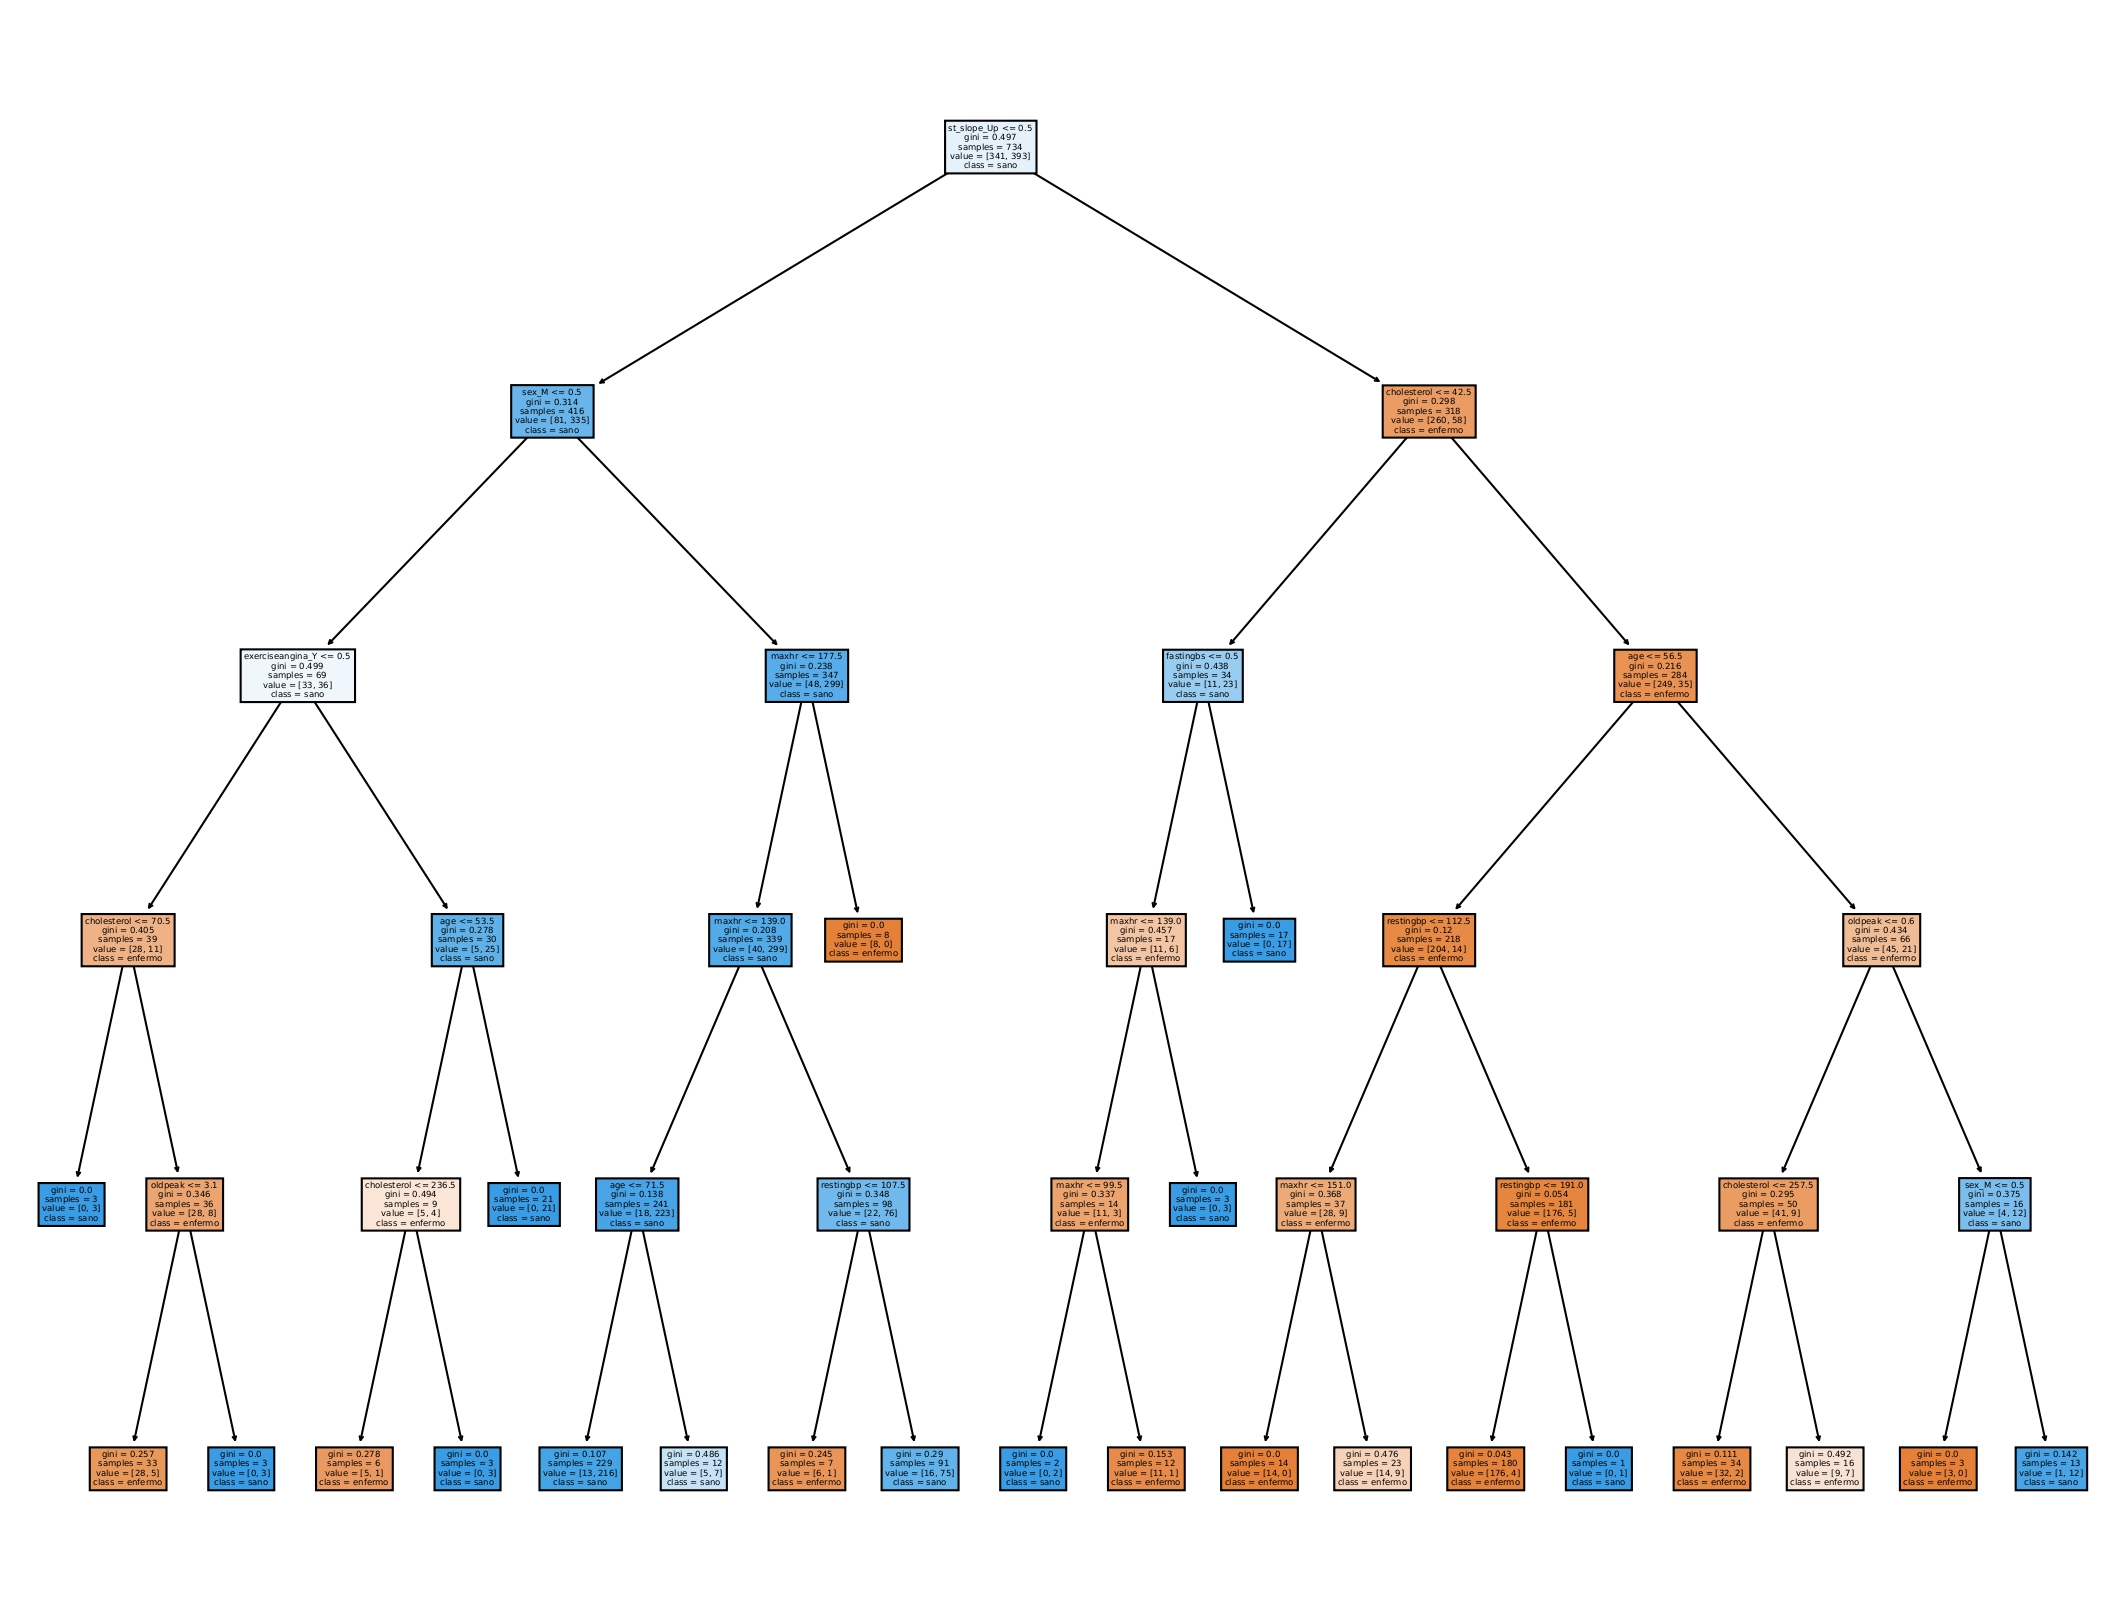

In [42]:
from wand.image import Image as WImage
img = WImage(filename='jpg_tree.jpg')
img

Podemos ver que comenzamos con todos los puntos del conjunto de entrenamiento en el nodo raíz (Samples = 734), cada uno estos puntos tienen etiquetas. Luego decidimos dividir los datos en grupos más pequeños según una característica. Por ejemplo, las primeras ramas se dividen según la variable St_slope. 

Una vez que tenemos estos subconjuntos, repetimos el proceso: nuevamente dividimos los datos de cada subconjunto en una característica diferente. Finalmente, llegamos a un punto en el que no se puede dividir los datos en grupos más pequeños, obteniendo un nodo hoja del árbol. Ahora podemos contar las etiquetas de los datos en esa hoja. Si un punto sin etiquetar llega a esa hoja, se clasificará como la etiqueta mayoritaria.

## Importamos las librerías y los datos

In [1]:
#Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importamos el dataset
#Fuente https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv('heart.csv', engine = 'python')

#Pasamos todas las letras a minúscula para mayor practicidad
df.columns = df.columns.str.strip().str.lower()

In [3]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Análisis exploratorio de datos EDA

In [4]:
#comprobamos que no haya datos nulos
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Vemos cuántos valores hay en heartdisease, la variable a predecir
print(df['heartdisease'].value_counts())

1    508
0    410
Name: heartdisease, dtype: int64


In [7]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


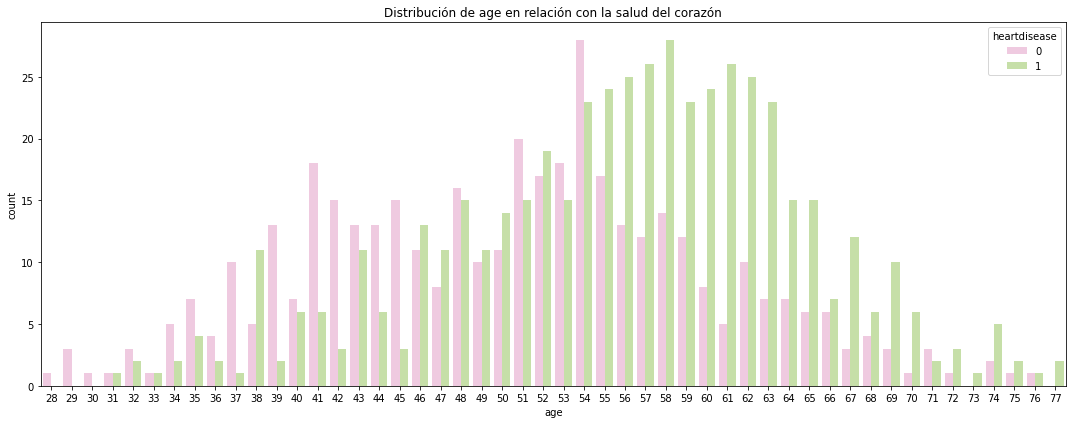

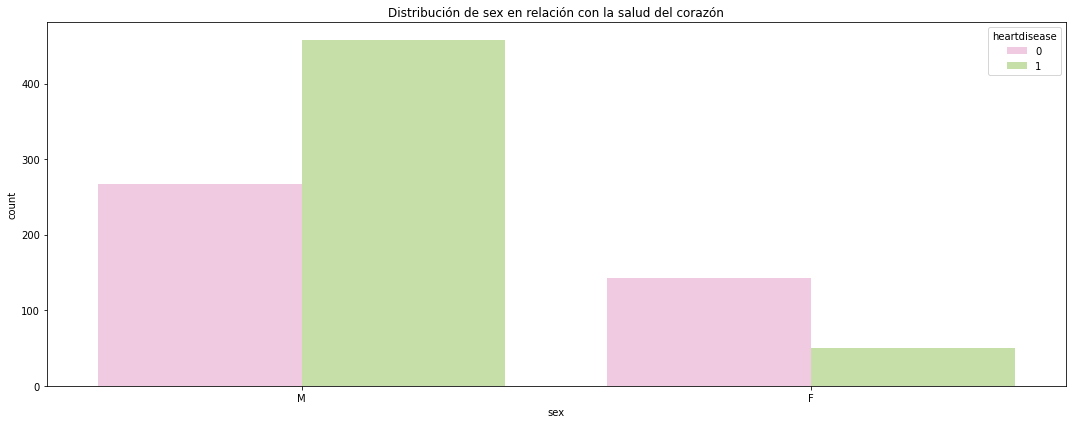

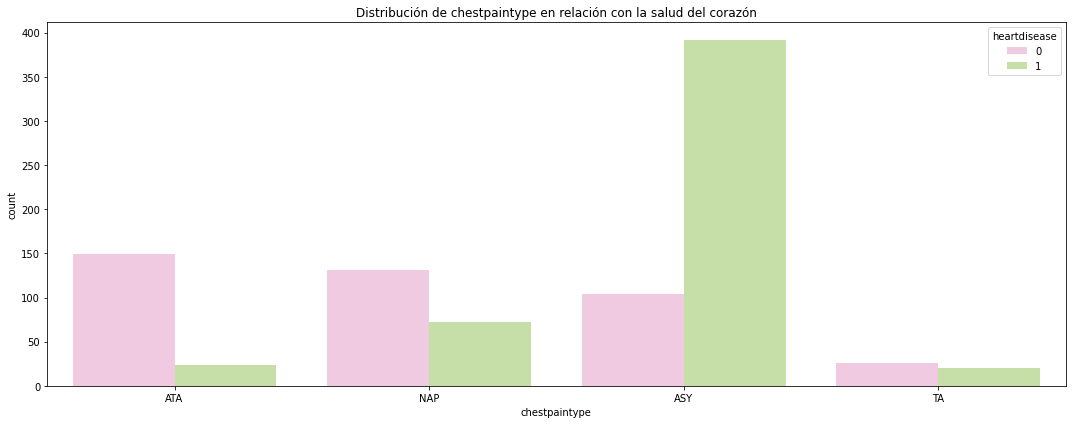

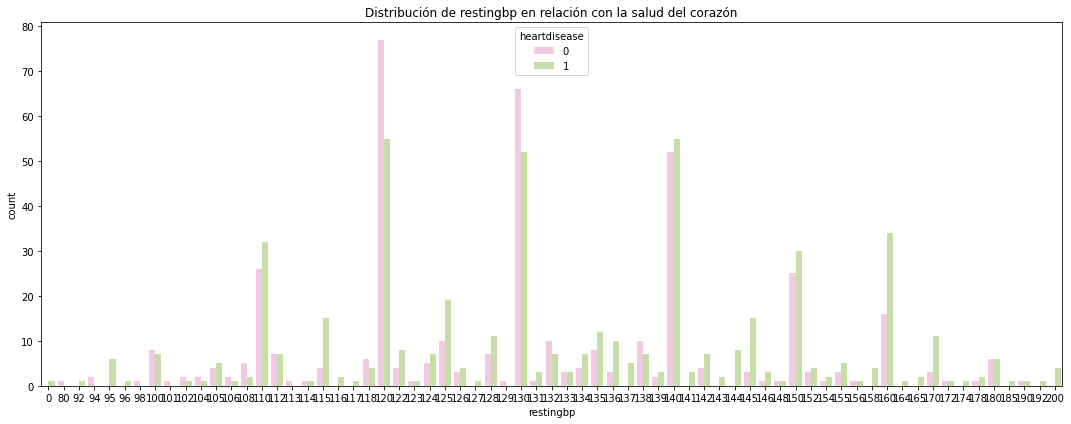

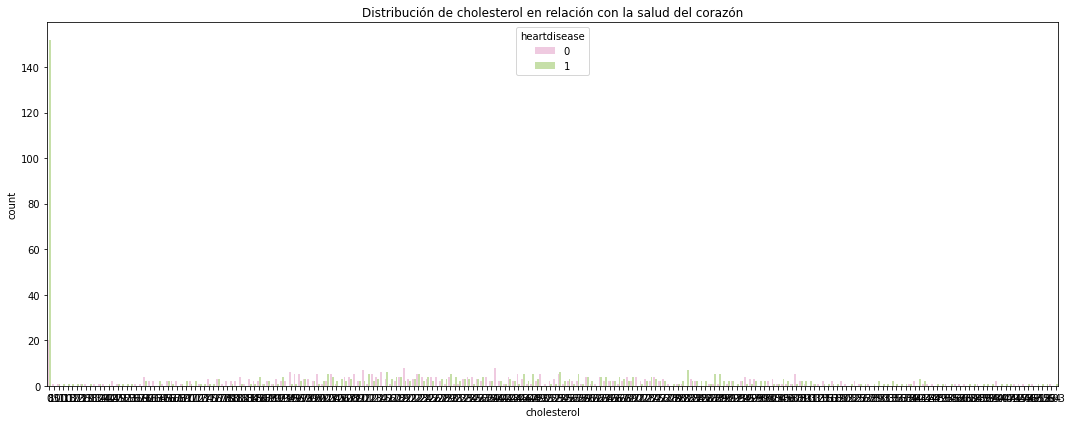

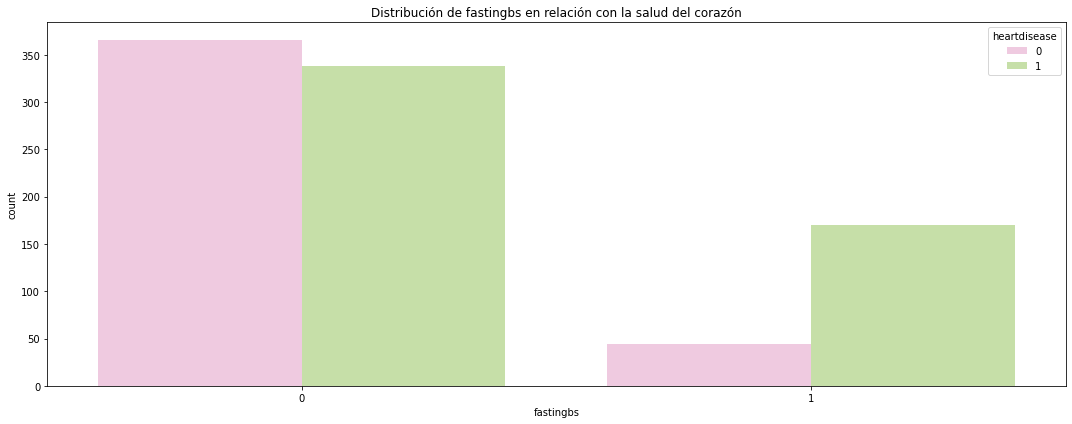

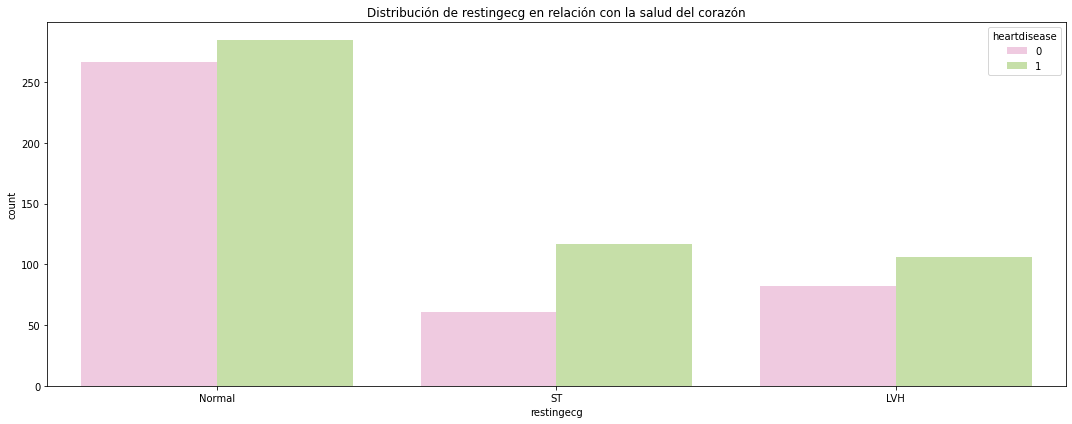

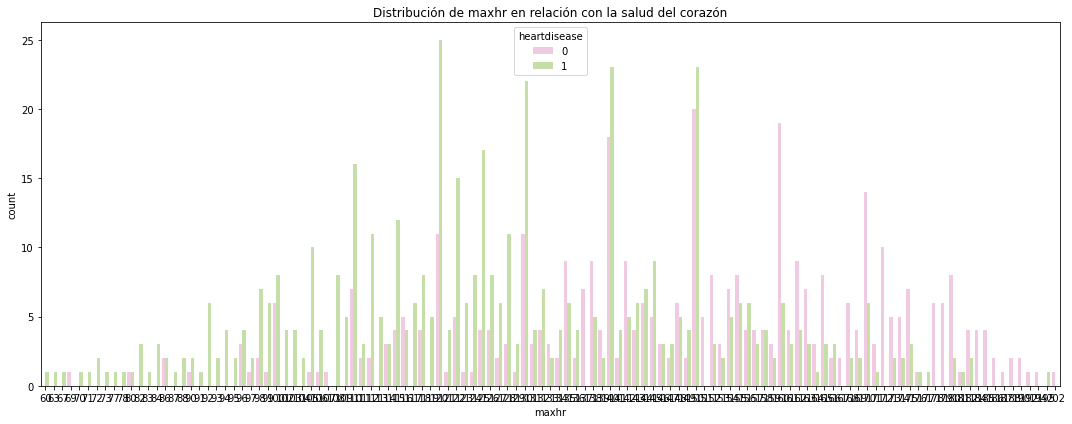

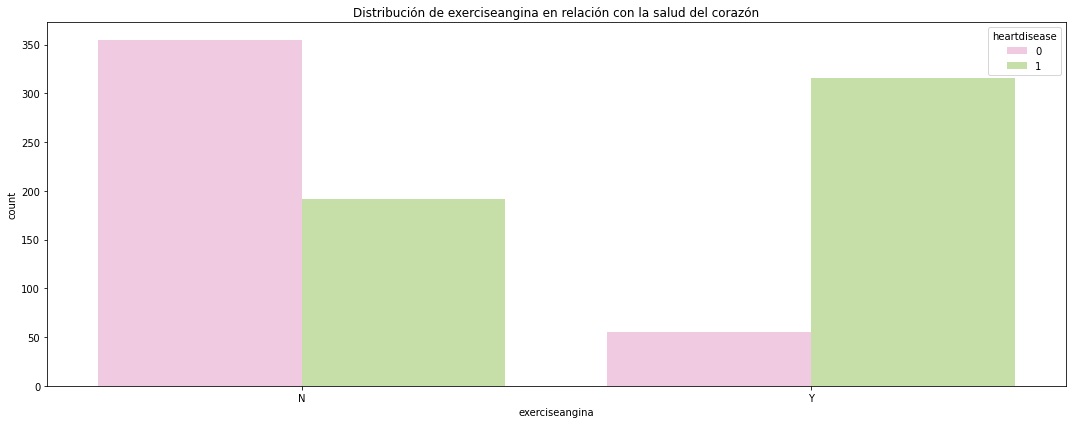

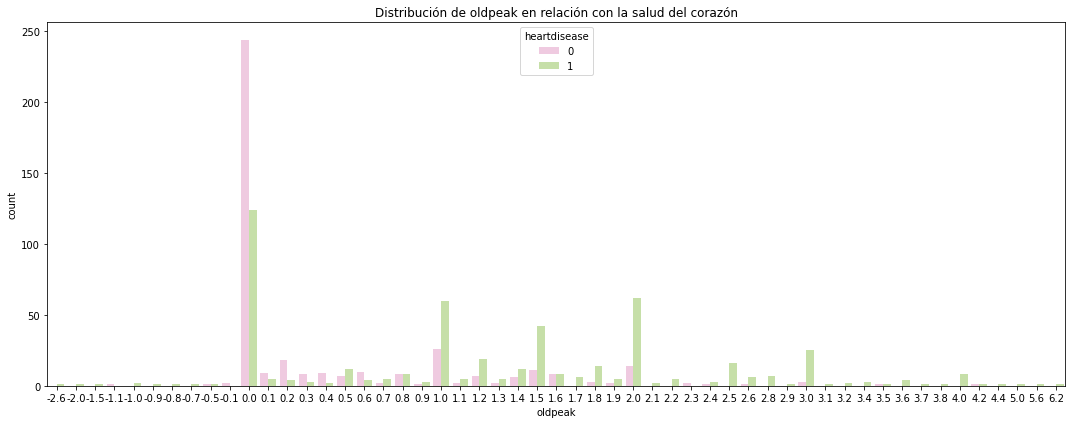

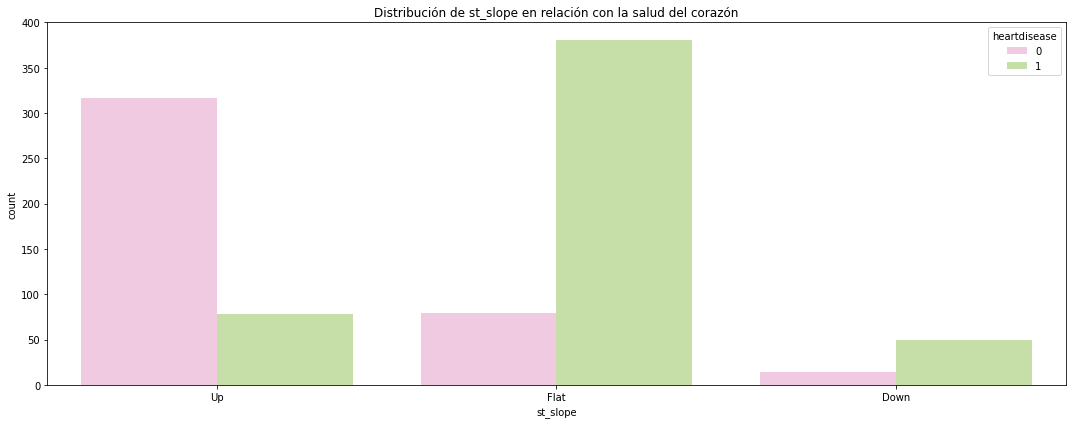

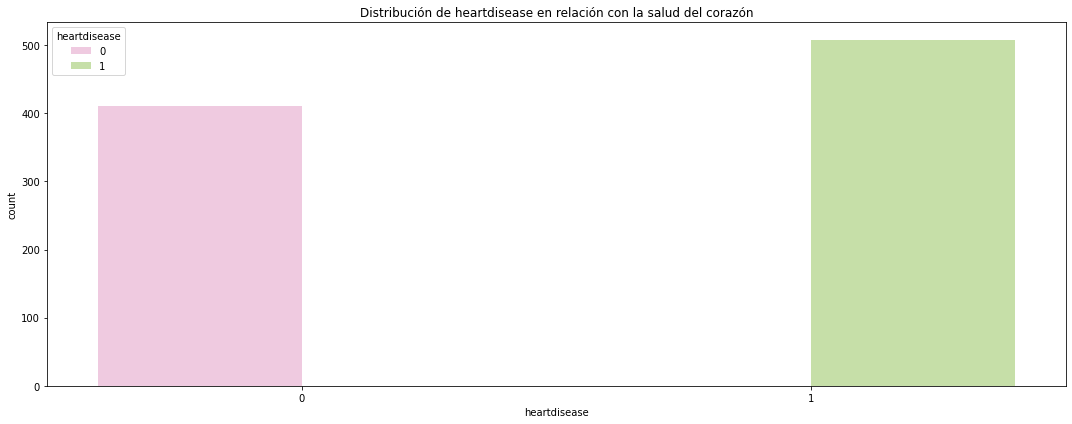

In [8]:
for feature in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df[feature],data = df, hue = 'heartdisease', palette='PiYG')
    plt.title(f'Distribución de {feature} en relación con la salud del corazón')
    plt.xlabel(f"{feature}")
    plt.tight_layout()
    plt.show()
    

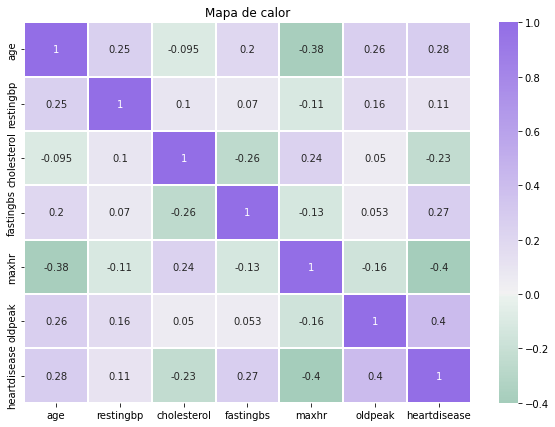

In [9]:
# Definimos el color del mapa de calor 
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Creamos un heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), center=0, annot = True, cmap=colors, robust=True, linewidths=.1)
plt.title('Mapa de calor')
plt.show()

# Arbol de decisión

In [10]:
#Convertimos las variables str a numeros binarios
df_dummies=pd.get_dummies(data=df, drop_first=True)

In [11]:
#Seleccionamos variables
# Variables predictoras
X = df_dummies.drop(columns='heartdisease')
# Variable objetivo a predecir
Y = df_dummies.heartdisease

In [12]:
#Dividimos los datos en training y testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.2)

### Parametros max_depth y ccp_alpha más precisos

Inicialmente trabajé el árbol con una profundidad (max_depth) de 4, sin considerar cuál es la profundidad que más precisión me brinda. Para mejorar esto, cree un bucle que va ajustando y testeando modelo cambiando los valores del parámetro max_dep. Luego, calcula el resultado de la precisión con cada valor. Finalmente, guarda las precisiones en la lista llamada prec_depth, para luego buscar la mayor precisión resultante y utilizar el valor correspondiente en el parámetro max_depth.

Se realizará el mismo proceso para encontrar el valor de ccp_alpha más preciso. Inicialmente se trabajó con ccp_alpha = 0.01
Fuente https://www.codecademy.com/paths/data-science/tracks/dsml-supervised-learning-i/modules/mle-decision-trees

In [13]:
#Lista de valores para max_depth, de 1 a 20
depths = range(1, 21)
#Lista para guardar precisiones
precision_depth = []
#Creamos un bucle para testear diferentes valores en max_depth
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    dt.fit(x_train, y_train)
    precision_depth.append(dt.score(x_test, y_test))
    
print(precision_depth)

[0.7608695652173914, 0.8043478260869565, 0.8152173913043478, 0.8206521739130435, 0.8260869565217391, 0.8097826086956522, 0.8260869565217391, 0.8206521739130435, 0.8097826086956522, 0.7554347826086957, 0.7771739130434783, 0.7771739130434783, 0.782608695652174, 0.7771739130434783, 0.7608695652173914, 0.7771739130434783, 0.7554347826086957, 0.782608695652174, 0.7608695652173914, 0.7663043478260869]


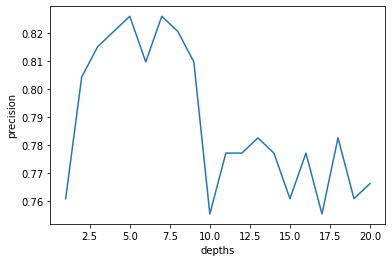

In [14]:
#Graficamos cada pecision con su profundidad
plt.plot(depths, precision_depth)
plt.xlabel('depths')
plt.ylabel('precision')
plt.show()


In [15]:
#Utilizamos np.max() para encontrar la mayor precision
max_precision_depth = np.max(precision_depth)

#Para encontrar la relación de los valores de precisión guardados en prec_depth y su correspondiente en depths, utilizamos la función numpy.argmax() 
#numpy.argmax() devuelve los índices de valores con los valores más altos de el array brindado
mejor_depth = depths[np.argmax(precision_depth)]
print(f'Mayor precision {round(max_precision_depth,3)} con max_depth = {mejor_depth}')

Mayor precision 0.826 con max_depth = 5


In [16]:
#Se repite el proceso con ccp_alpha

#Lista para guardar precisiones
precision_ccp = []
ccp = np.logspace(-3, 0, num=20) 
#Creamos un bucle para testear diferentes valores en ccp_alpha
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = mejor_depth, ccp_alpha=i)
    dt_prune.fit(x_train, y_train)
    precision_ccp.append(dt_prune.score(x_test, y_test))
    
print(precision_ccp)

[0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.8206521739130435, 0.7989130434782609, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348]


In [17]:
#Utilizamos np.max() para encontrar la mayor precision
max_precision_ccp = np.max(precision_ccp)

mejor_ccp = ccp[np.argmax(precision_ccp)]
print(f'Mayor precision {round(max_precision_ccp,3)} con ccp_alpha = {mejor_ccp}')

Mayor precision 0.826 con ccp_alpha = 0.001


## Árbol definitivo

In [18]:
#Llamamos al constructor del arbol de decision
dt = DecisionTreeClassifier(max_depth= mejor_depth, ccp_alpha= mejor_ccp,criterion='gini')

#Entrenamos el modelo
arbol_enfermedad = dt.fit(x_train, y_train)
arbol_enfermedad


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

### Predicción

In [19]:
#Calculamos la predicción para todos los pacientes
y_pred = arbol_enfermedad.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

### Gráfico del árbol

|--- feature_14 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_2 <= 70.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  70.50
|   |   |   |   |--- feature_5 <= 3.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |--- feature_12 >  0.50
|   |   |   |--- feature_0 <= 53.50
|   |   |   |   |--- feature_2 <= 236.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  236.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  53.50
|   |   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_4 <= 177.50
|   |   |   |--- feature_4 <= 139.00
|   |   |   |   |--- feature_0 <= 71.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  71.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  139.00
|   |   |   |   |--- feature_1 <= 107.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature

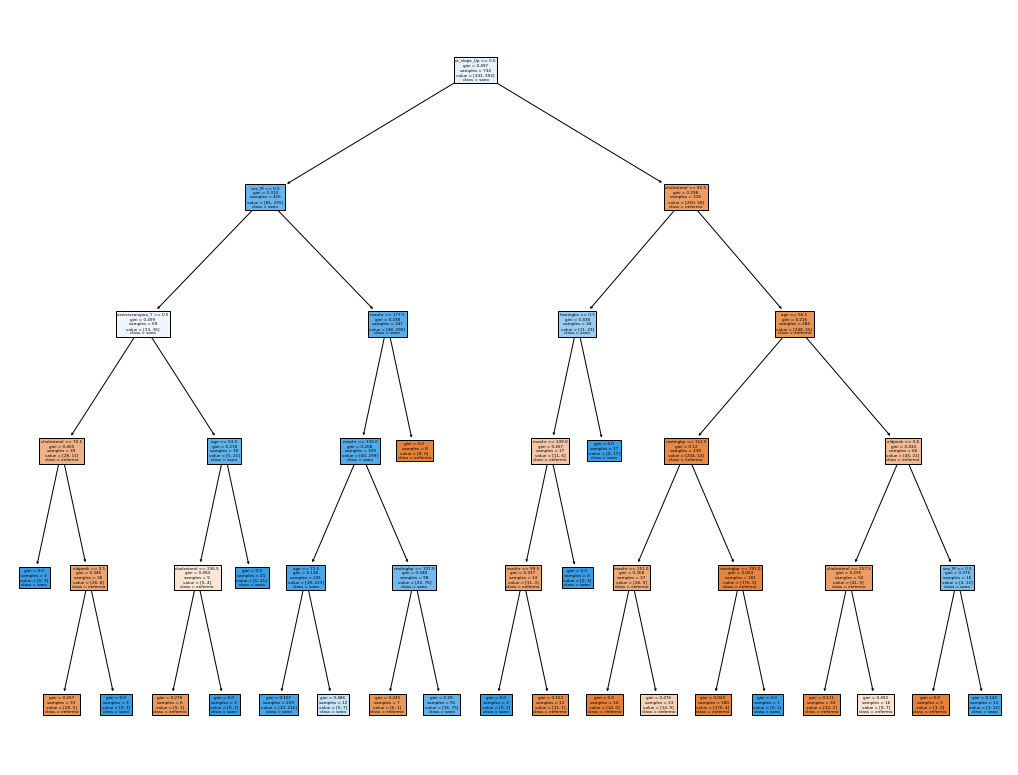

In [35]:
#Realizamos el gráfico del árbol
plt.figure(figsize=(18, 14)) #dimensiones del gráfico
tree.plot_tree(arbol_enfermedad, feature_names = list(x_train.columns.values), class_names= ['enfermo', 'sano'], filled=True)
print(tree.export_text(arbol_enfermedad))

#Guardamos el gráfico en formato pdf
plt.savefig('pdf_tree.pdf', bbox_inches='tight')

In [21]:
#Generamos una muestra
muestra = X.sample()
muestra

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
439,74,138,0,0,116,0.2,1,0,1,0,1,0,0,0,1


In [22]:
#Calculamos la probabilidad con la función predict_proba
dt.predict_proba(muestra)

array([[0.33333333, 0.66666667]])

## Métricas

### Matriz de confusion

In [23]:
#importamos la librería
from sklearn.metrics import confusion_matrix
#Creamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión del árbol de decisión: \n {cm}")

Matriz de confusión del árbol de decisión: 
 [[63 14]
 [18 89]]


### Precisión

In [24]:
#Calculamos la precision
#print(dt.score(x_test, y_test))
print(f'Precision el modelo con el criterio de Gini: {accuracy_score(y_test, y_pred)}')

Precision el modelo con el criterio de Gini: 0.8260869565217391


Precision inicial, previo a calcular los parámetros más precisos de DecisionTreeClassifier, con los valores max_depth=4, ccp_alpha=0.01 =

0.8043478260869565

Podemos ver que tenemos un resultado de:
61 verdaderos positivos, 92 verdaderos negtivos, 15 falsos positivos, 16 falsos negativos

### Recall

In [25]:
#Importamos librerías
from sklearn.metrics import recall_score

#Calculamos el recall
recall = recall_score(y_test, y_pred)

print(f"Recall del árbol de decisión: {recall}")

Recall del árbol de decisión: 0.8317757009345794


### F1 score

In [26]:
#Importamos librerías
from sklearn.metrics import f1_score

#F1 score
score = f1_score(y_pred, y_test)

print (f"F1 score del árbol de decisión: {score}")

Decision Tree F1 score: 0.8476190476190476


### Bias y Varianza

In [27]:
#Importamos la librería
from mlxtend.evaluate import bias_variance_decomp

#Calculamos el error irreducible, el bias y la varianza
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        arbol_enfermedad, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=123)

print('Promedio de error irreducible: %.3f' % avg_expected_loss)
print('Promedio de bias: %.3f' % avg_bias)
print('Prmedio de varianza: %.3f' % avg_var)

Promedio de error irreducible: 0.192
Promedio de bias: 0.147
Prmedio de varianza: 0.091
